<a href="https://colab.research.google.com/github/johnboscoimmanuel/PRACTICE/blob/main/spam_mail_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [35]:
# load the dataset into pandas
df=pd.read_csv('/content/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [36]:
#using group method to see count of label
df.groupby(df['label_num'])['label'].count()

label_num
0    3672
1    1499
Name: label, dtype: int64

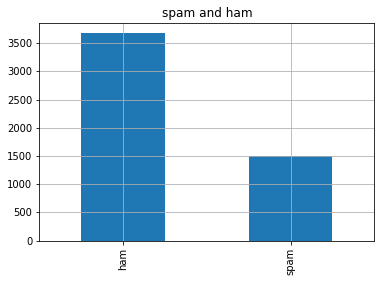

In [37]:
#checkin ham and spam with bar plot
df['label'].value_counts().plot(kind='bar',title='spam and ham')
plt.grid(True)
plt.show()

In [38]:
#checking any null values in dataframe
df['text'].isnull().sum()

0

In [39]:
#fix the null values using pd.notnull method
df=df.where((pd.notnull(df)),'')

In [40]:
#split the x - indipendent variable and y- depentent variable
x=df['text'].values
y=df['label_num'].values

In [41]:
#split the train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)



In [42]:
# feature extration  for x- train and test
tf=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train=tf.fit_transform(x_train)
x_test=tf.transform(x_test)

In [43]:
#change the dtaype as int for y- train and test
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [44]:
x_train

<4136x45076 sparse matrix of type '<class 'numpy.float64'>'
	with 270337 stored elements in Compressed Sparse Row format>

In [45]:
#model build in algorithem
lr=LogisticRegression().fit(x_train,y_train)

# training prediction

y_training=lr.predict(x_train)

accuracy_score(y_train,y_training)



0.9970986460348162

In [46]:
#test prediction

y_pred=lr.predict(x_test)

accuracy_score(y_test,y_pred)

0.9806763285024155

In [47]:
# load actual value and predicted value into new dataframe
data=pd.DataFrame({'actual':y_test,'predicted':y_pred})
data.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


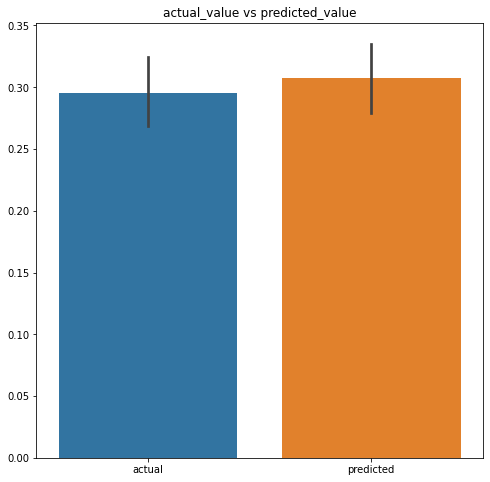

In [48]:
#barplot into new dataframe
fig=plt.figure(figsize=(8,8))
sns.barplot(data=data)
plt.title('actual_value vs predicted_value')
plt.show()

In [49]:
# predictive system

input_data=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

text_extraction=tf.transform(input_data)

prediction=lr.predict(text_extraction)

print(prediction)
print("-----------------")

if prediction[0]==1:
  print('Ham')
else:
  print('Spam')


[1]
-----------------
Ham
